In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score

Data Processing

In [2]:
boston_df = pd.read_csv('../Datasets/BostonHousing.csv')

In [3]:
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
boston_df.shape

(506, 14)

In [5]:
boston_df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
price      0
dtype: int64

In [6]:
boston_df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
boston_df.groupby('price').mean()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
price,,,,,,,,,,,,,
5.0,53.136300,0.0000,18.100000,0.000,0.693000,5.5680,100.000000,1.457500,24.000,666.0000,20.20000,390.935000,26.785000
5.6,25.046100,0.0000,18.100000,0.000,0.693000,5.9870,100.000000,1.588800,24.000,666.0000,20.20000,396.900000,26.770000
6.3,9.916550,0.0000,18.100000,0.000,0.693000,5.8520,77.800000,1.500400,24.000,666.0000,20.20000,338.160000,29.970000
7.0,22.964735,0.0000,22.920000,0.000,0.651000,4.9665,99.150000,1.706800,14.000,688.5000,20.15000,216.160000,30.475000
7.2,16.377533,0.0000,18.100000,0.000,0.690667,6.0180,99.366667,1.611633,24.000,666.0000,20.20000,273.683333,26.726667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46.7,0.298190,0.0000,6.200000,0.000,0.504000,7.6860,17.000000,3.375100,8.000,307.0000,17.40000,377.510000,3.920000
48.3,0.331470,0.0000,6.200000,0.000,0.507000,8.2470,70.400000,3.651900,8.000,307.0000,17.40000,378.950000,3.950000
48.5,0.035100,95.0000,2.680000,0.000,0.416100,7.8530,33.200000,5.118000,4.000,224.0000,14.70000,392.780000,3.810000


Understanding the correlation

In [8]:
correlation = boston_df.corr()

In [9]:
import seaborn as sns

<Axes: >

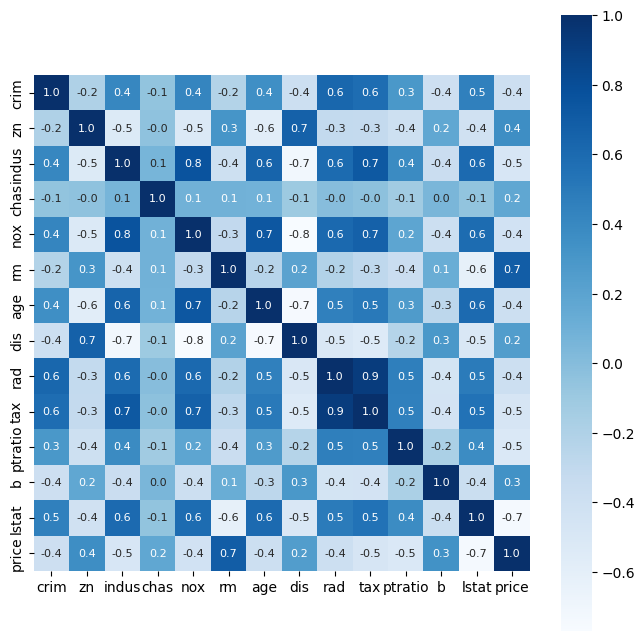

In [10]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

Splitting the data and target

In [11]:
X = boston_df.drop(columns='price',axis=1)

Y = boston_df.price

In [12]:
print(X)

        crim    zn  indus  chas    nox  ...  rad  tax  ptratio       b  lstat
0    0.00632  18.0   2.31     0  0.538  ...    1  296     15.3  396.90   4.98
1    0.02731   0.0   7.07     0  0.469  ...    2  242     17.8  396.90   9.14
2    0.02729   0.0   7.07     0  0.469  ...    2  242     17.8  392.83   4.03
3    0.03237   0.0   2.18     0  0.458  ...    3  222     18.7  394.63   2.94
4    0.06905   0.0   2.18     0  0.458  ...    3  222     18.7  396.90   5.33
..       ...   ...    ...   ...    ...  ...  ...  ...      ...     ...    ...
501  0.06263   0.0  11.93     0  0.573  ...    1  273     21.0  391.99   9.67
502  0.04527   0.0  11.93     0  0.573  ...    1  273     21.0  396.90   9.08
503  0.06076   0.0  11.93     0  0.573  ...    1  273     21.0  396.90   5.64
504  0.10959   0.0  11.93     0  0.573  ...    1  273     21.0  393.45   6.48
505  0.04741   0.0  11.93     0  0.573  ...    1  273     21.0  396.90   7.88

[506 rows x 13 columns]


In [13]:
print(Y)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: price, Length: 506, dtype: float64


Splitting the data into training and testing

In [15]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [16]:
print(X.shape,X_train.shape,X_test.shape)

(506, 13) (404, 13) (102, 13)


Model training

In [17]:
model = XGBRegressor()

In [18]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation

In [21]:
train_predict = model.predict(X_train)

In [22]:
print(train_predict)

[23.112196  20.992601  20.10438   34.67932   13.920501  13.499354
 21.998383  15.206723  10.89543   22.67402   13.795236   5.602332
 29.808502  49.98666   34.89634   20.594336  23.388903  19.2118
 32.69294   19.604128  26.978151   8.405952  46.00062   21.70406
 27.084402  19.372278  19.297894  24.79984   22.608278  31.707775
 18.53683    8.703393  17.40025   23.698814  13.29729   10.504759
 12.693588  24.994888  19.694864  14.911037  24.20254   24.991112
 14.901547  16.987965  15.592753  12.704759  24.505623  15.007718
 49.999355  17.509344  21.18844   31.999287  15.606071  22.902134
 19.309835  18.697083  23.302961  37.19767   30.102247  33.117855
 20.993683  50.00471   13.40048    5.002565  16.50862    8.4016905
 28.651423  19.49218   20.595366  45.404697  39.808857  33.4055
 19.81498   33.406376  25.30206   49.998615  12.544487  17.433802
 18.602612  22.601418  50.004013  23.814182  23.313164  23.097467
 41.71243   16.112017  31.604454  36.09397    7.0009975 20.406271
 19.992195  12

In [23]:
from sklearn import metrics

In [24]:
# R squared error 
score_1 = metrics.r2_score(Y_train,train_predict)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train,train_predict)

print(score_1)

print(score_2)

0.9999980039471451
0.0091330346494618


In [25]:
test_predict = model.predict(X_test)

In [26]:
sc_1 = metrics.r2_score(Y_test,test_predict)

sc_2 = metrics.mean_absolute_error(Y_test,test_predict)

In [27]:
print(sc_1)

print(sc_2)

0.9051721149855378
2.0748727686264927


Visualizing the prediction

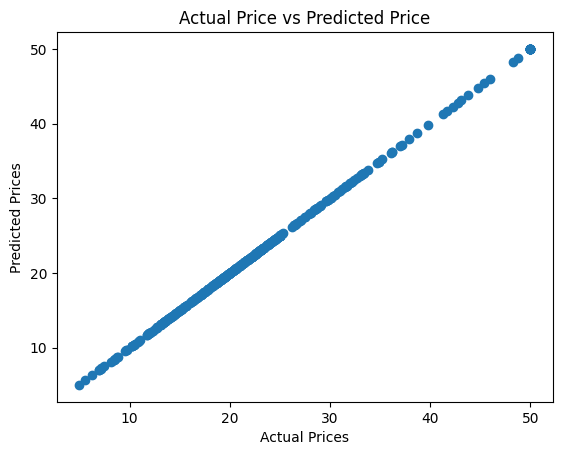

In [28]:
plt.scatter(Y_train,train_predict)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

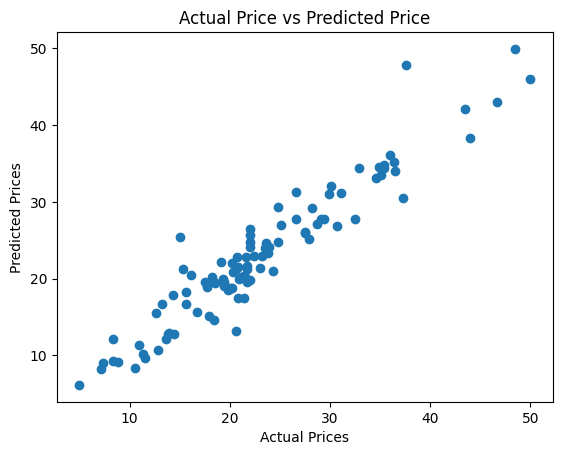

In [29]:
plt.scatter(Y_test,test_predict)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

Build system

In [32]:
input_data = (0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.6,12.43)

input_data_np = np.asarray(input_data)

input_data_reshape = input_data_np.reshape(1,-1)

prediction = model.predict(input_data_reshape)

print("The predicted price of the house is: ",prediction[0])


The predicted price of the house is:  22.884857
